In [1]:
import pandas as pd
elife_test = pd.read_csv("eLife_test.csv")
plos_test = pd.read_csv("PLOS_test.csv")

In [2]:
elife_test

,article,headings,keywords,id,title,abstract
0,Acylation of diverse carbohydrates occurs acro...,"['Abstract', 'Introduction', 'Results and disc...","['biochemistry and chemical biology', 'computa...",elife-81547-v1,A novel fold for acyltransferase-3 (AT3) prote...,Acylation of diverse carbohydrates occurs acro...
1,Honey bee ecology demands they make both rapid...,"['Abstract', 'Introduction', 'Results', 'Discu...",['computational and systems biology'],elife-86176-v2,How honey bees make fast and accurate decisions,Honey bee ecology demands they make both rapid...
2,"Biguanides , including the world’s most prescr...","['Abstract', 'Introduction', 'Results', 'Discu...",['genetics and genomics'],elife-82210-v1,Ether lipid biosynthesis promotes lifespan ext...,"Biguanides , including the world’s most prescr..."
3,Ecological relationships between bacteria medi...,"['Abstract', 'Introduction', 'Results', 'Discu...","['microbiology and infectious disease', 'ecolo...",elife-83152-v2,Universal gut microbial relationships in the g...,Ecological relationships between bacteria medi...
4,Gamma oscillations are believed to underlie co...,"['Abstract', 'Introduction', 'Results', 'Discu...",['neuroscience'],elife-83044-v2,Mechanisms and functions of respiration-driven...,Gamma oscillations are believed to underlie co...
...,...,...,...,...,...,...
137,High-throughput transgenesis using synthetic D...,"['Abstract', 'Introduction', 'Results', 'Discu...","['tools and resources', 'genetics and genomics']",elife-84831-v1,High-throughput library transgenesis in Caenor...,High-throughput transgenesis using synthetic D...
138,"To reach their final destinations , outer memb...","['Abstract', 'Introduction', 'Results', 'Discu...",['structural biology and molecular biophysics'...,elife-82885-v1,Deep learning-driven insights into super prote...,"To reach their final destinations , outer memb..."
139,Midbrain dopamine ( DA ) neurons are key regul...,"['Abstract', 'Introduction', 'Results', 'Discu...",['neuroscience'],elife-87902-v2,Conditional deletion of neurexins dysregulates...,Midbrain dopamine ( DA ) neurons are key regul...
140,"Mobile health ( mHealth ) interventions , whic...","['Abstract', 'Introduction', 'Methods', 'Resul...","['medicine', 'epidemiology and global health']",elife-79615-v2,Lack of ownership of mobile phones could hinde...,"Mobile health ( mHealth ) interventions , whic..."


In [3]:
def make_prompt(df, i):
    # keywords = df["keywords"][i]
    title = df["title"][i]
    abstract = df["abstract"][i]
    return f"Title: {title}\n\nAbstract: {abstract}"

In [4]:
print(make_prompt(elife_test,0))

Title: A novel fold for acyltransferase-3 (AT3) proteins provides a framework for transmembrane acyl-group transfer

Abstract: Acylation of diverse carbohydrates occurs across all domains of life and can be catalysed by proteins with a membrane bound acyltransferase-3 ( AT3 ) domain ( PF01757 ) . In bacteria , these proteins are essential in processes including symbiosis , resistance to viruses and antimicrobials , and biosynthesis of antibiotics , yet their structure and mechanism are largely unknown . In this study , evolutionary co-variance analysis was used to build a computational model of the structure of a bacterial O-antigen modifying acetyltransferase , OafB . The resulting structure exhibited a novel fold for the AT3 domain , which molecular dynamics simulations demonstrated is stable in the membrane . The AT3 domain contains 10 transmembrane helices arranged to form a large cytoplasmic cavity lined by residues known to be essential for function . Further molecular dynamics s

In [1]:
import transformers
import torch

# model_id = "aaditya/OpenBioLLM-Llama3-8B"
#model_path = "/home/dachengma/Llama3-OpenBioLLM-8B/"
# model_path = "/home/dachengma/models/LLM-Research/Meta-Llama-3-8B-Instruct"
model_path="/home/dachengma/biolaysumm2024_data/LLaMA-Factory/llama3_lora_merged_eLife"

pipeline = transformers.pipeline(
    "text-generation",
    model=model_path,
    model_kwargs={"torch_dtype": torch.bfloat16},
    device="cuda",
)

/home/dachengma/miniconda3/envs/llm/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 9/9 [00:02<00:00,  3.93it/s]
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


RuntimeError: Expected one of cpu, cuda, ipu, xpu, mkldnn, opengl, opencl, ideep, hip, ve, fpga, ort, xla, lazy, vulkan, mps, meta, hpu, mtia, privateuseone device type at start of device string: auto

In [6]:

# messages = [
#     {"role": "system", "content": "You are an expert  from the healthcare and biomedical domain with extensive medical knowledge and practical experience. Your name is OpenBioLLM, and you were developed by Saama AI Labs. who's willing to help answer the user's query with explanation. In your explanation, leverage your deep medical expertise such as relevant anatomical structures, physiological processes, diagnostic criteria, treatment guidelines, or other pertinent medical concepts. Use precise medical terminology while still aiming to make the explanation clear and accessible to a general audience."},
#     {"role": "user", "content": "How can i split a 3mg or 4mg waefin pill so i can get a 2.5mg pill?"},
# ]

messages = [
    {"role": "system", "content": f"You are an expert in writing lay summaries for biomedical literature, for example, here is one example of abstract and paired lay summary {make_top_shot_prompt(elife_test, 0)}you will write lay summary in 10-20 sentences for the abstract that is given to you. write in readable way but maximize relevance and factuality. only respond the actual lay summary, here is the given title and abstract,"},
    {"role": "user", "content": make_prompt(elife_test, 0)}
]

prompt = pipeline.tokenizer.apply_chat_template(
        messages, 
        tokenize=False, 
        add_generation_prompt=True
)

terminators = [
    pipeline.tokenizer.eos_token_id,
    pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

outputs = pipeline(
    prompt,
    max_new_tokens=2048,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.0001,
    top_p=0.9,
)
print(outputs[0]["generated_text"][len(prompt):])


NameError: name 'make_top_shot_prompt' is not defined

In [7]:
# KNN adaptive in-context learning 
elife_3shot = pd.read_json("eLife_generated_3shot_examples_bge-m3.json", lines=True)

In [8]:
import matplotlib.pyplot as plt
import json

In [9]:
elife_test["3shot"] = elife_3shot["FewShotExamples"]

In [10]:
json.loads(elife_test["3shot"][3])[0]

{'Abstract': 'Human-associated microbial communities vary across individuals: possible contributing factors include ( genetic ) relatedness , diet , and age . However , our surroundings , including individuals with whom we interact , also likely shape our microbial communities . To quantify this microbial exchange , we surveyed fecal , oral , and skin microbiota from 60 families ( spousal units with children , dogs , both , or neither ) . Household members , particularly couples , shared more of their microbiota than individuals from different households , with stronger effects of co-habitation on skin than oral or fecal microbiota . Dog ownership significantly increased the shared skin microbiota in cohabiting adults , and dog-owning adults shared more ‘skin’ microbiota with their own dogs than with other dogs . Although the degree to which these shared microbes have a true niche on the human body , vs transient detection after direct contact , is unknown , these results suggest that 

In [16]:
elife_train_val_abstracts[np.argmax(similarity, 1)][3]

NameError: name 'elife_train_val_abstracts' is not defined

In [12]:
def make_top_shot_prompt(df, i):

    topshot = json.loads(df["3shot"][i])[0]
    return f"Example: {topshot}"

In [13]:
make_top_shot_prompt(elife_test, 0)

"Example: {'Abstract': 'The integration of most membrane proteins into the cytoplasmic membrane of bacteria occurs co-translationally . The universally conserved YidC protein mediates this process either individually as a membrane protein insertase , or in concert with the SecY complex . Here , we present a structural model of YidC based on evolutionary co-variation analysis , lipid-versus-protein-exposure and molecular dynamics simulations . The model suggests a distinctive arrangement of the conserved five transmembrane domains and a helical hairpin between transmembrane segment 2 ( TM2 ) and TM3 on the cytoplasmic membrane surface . The model was used for docking into a cryo-electron microscopy reconstruction of a translating YidC-ribosome complex carrying the YidC substrate FOc . This structure reveals how a single copy of YidC interacts with the ribosome at the ribosomal tunnel exit and identifies a site for membrane protein insertion at the YidC protein-lipid interface . Together

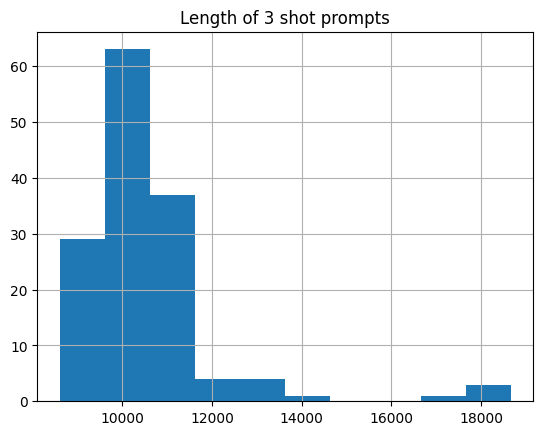

In [14]:
elife_3shot.FewShotExamples.apply(len).hist()
plt.title("Length of 3 shot prompts")
plt.show()

In [15]:
# use FlagEmbedding to calculate pair-wise embedding 
elife_train = pd.read_json("/home/dachengma/biolaysumm2024_data/eLife_train.jsonl", lines=True)
elife_val = pd.read_json("/home/dachengma/biolaysumm2024_data/eLife_val.jsonl", lines=True)

In [74]:
from FlagEmbedding import BGEM3FlagModel

model = BGEM3FlagModel('/home/dachengma/bge-m3',  
                       use_fp16=True) # Setting use_fp16 to True speeds up computation with a slight performance degradation

----------using 8*GPUs----------


In [90]:
def get_abstract(article):
    return article.split("\n")[0]

In [93]:
elife_train["abstract"] = elife_train["article"].apply(get_abstract)
elife_val["abstract"] = elife_val["article"].apply(get_abstract)

In [95]:
elife_test_abstracts = elife_test.abstract.tolist()
elife_train_val_abstracts = elife_train["abstract"].tolist() + elife_val["abstract"].tolist()

In [98]:
len(elife_test_abstracts), len(elife_train_val_abstracts)

(142, 4587)

In [99]:
embeddings_1 = model.encode(elife_test_abstracts, 
                            batch_size=12, 
                            max_length=8192, # If you don't need such a long length, you can set a smaller value to speed up the encoding process.
                            )['dense_vecs']
embeddings_2 = model.encode(elife_train_val_abstracts)['dense_vecs']
similarity = embeddings_1 @ embeddings_2.T
print(similarity)

Inference Embeddings: 100%|██████████| 48/48 [00:30<00:00,  1.57it/s]


[[0.3145 0.4753 0.4604 ... 0.4954 0.4734 0.4963]
 [0.374  0.4148 0.477  ... 0.4937 0.4802 0.4917]
 [0.3955 0.469  0.4138 ... 0.4668 0.3848 0.4468]
 ...
 [0.3362 0.5024 0.3904 ... 0.5312 0.535  0.4363]
 [0.4238 0.3892 0.4727 ... 0.3796 0.3853 0.3804]
 [0.4148 0.4502 0.47   ... 0.429  0.4346 0.4312]]


In [122]:
# save similarity to pickle
import pickle
with open('elife_similarity.pkl', 'wb') as f:
    pickle.dump(similarity, f)

In [102]:
import numpy as np

In [107]:
np.argmax(similarity, 1)

array([1843, 3202, 3917, 2042, 2684, 3513, 1239, 3383,  338,  713, 3199,
       2538, 2674,  773,  120, 2935, 1220, 4151, 4237, 3258, 4553, 3557,
       2533, 2883, 3045, 4244, 2820,   21, 3067, 4041, 1326, 2944, 3157,
       2653,  545,  594, 3984, 1992, 4326, 3363, 3654, 2615,  297, 1075,
       1350, 3177, 1512,  981, 3427, 3523, 3999, 4225,  628, 2470, 1518,
       1789,  182, 3295, 1962, 4308, 1104, 4222, 3605, 1239, 2827,  177,
        989, 3168,  328, 2108, 2275, 1442, 3039, 3409, 1448, 3051, 1475,
       3674, 3461, 3070, 3368, 3641, 2965, 4563, 2559,   90, 2386, 2325,
       2338, 3698, 4009, 1442, 4374, 1184,  160, 2977, 3850, 4320,  818,
        295,  640, 2926,  904,  104, 4553, 1327,  375, 3695, 2332, 2538,
       1645, 3480, 3961, 3097, 1994,  936, 4428, 3692,  242,  554, 2055,
        795, 3956, 3982, 1116, 3257, 1173, 1607, 2614,  716, 2700,  634,
       3192, 4524, 3434, 2987, 2799, 2170,   93, 2575, 3250, 1432])

In [110]:
elife_train_val_abstracts = np.array(elife_train_val_abstracts)

In [134]:
elife_test_topshot = elife_train_val_abstracts[np.argmax(similarity, 1)]

In [144]:
elife_train_val_summs = np.array(elife_train["lay_summary"].to_list() + elife_val["lay_summary"].to_list())

In [145]:
elife_test_topshot_summ = elife_train_val_summs[np.argmax(similarity, 1)]

In [147]:
len(elife_test_topshot_summ)

142

In [125]:
# do the same for plos
plos_train = pd.read_json("/home/dachengma/biolaysumm2024_data/PLOS_train.jsonl", lines=True)
plos_val = pd.read_json("/home/dachengma/biolaysumm2024_data/PLOS_val.jsonl", lines=True)
plos_train["abstract"] = plos_train["article"].apply(get_abstract)


In [126]:
plos_val["abstract"] = plos_val["article"].apply(get_abstract)

In [127]:
plos_test_abstracts = plos_test.abstract.tolist()
plos_train_val_abstracts = plos_train["abstract"].tolist() + plos_val["abstract"].tolist()

In [129]:
len(plos_test_abstracts), len(plos_train_val_abstracts)

(142, 26149)

In [130]:
embeddings_1_plos = model.encode(plos_test_abstracts, 
                            batch_size=12, 
                            max_length=8192, # If you don't need such a long length, you can set a smaller value to speed up the encoding process.
                            )['dense_vecs']
embeddings_2_plos = model.encode(plos_train_val_abstracts)['dense_vecs']
similarity_plos = embeddings_1_plos @ embeddings_2_plos.T
print(similarity_plos)

Inference Embeddings: 100%|██████████| 273/273 [03:44<00:00,  1.22it/s]


[[0.4563 0.4702 0.395  ... 0.517  0.4084 0.3796]
 [0.403  0.4138 0.4749 ... 0.6562 0.4116 0.3562]
 [0.426  0.4548 0.4507 ... 0.4858 0.5083 0.398 ]
 ...
 [0.3845 0.4868 0.4216 ... 0.523  0.3794 0.31  ]
 [0.3923 0.5347 0.5146 ... 0.572  0.4004 0.4102]
 [0.3699 0.4202 0.4443 ... 0.4653 0.4624 0.436 ]]


In [132]:

with open('plos_similarity.pkl', 'wb') as f:
    pickle.dump(similarity_plos, f)

In [133]:
similarity_plos.shape

(142, 26149)

In [135]:
plos_train_val_abstracts = np.array(plos_train_val_abstracts)
plos_test_topshot = plos_train_val_abstracts[np.argmax(similarity_plos, 1)]

In [149]:
plos_train_val_summs = np.array(plos_train["lay_summary"].to_list() + plos_val["lay_summary"].to_list())
plos_test_topshot_summ = plos_train_val_summs[np.argmax(similarity_plos, 1)]

In [139]:
# save elife_test_topshot to pickle
with open("elife_topshot.pickle", "wb") as f:
    pickle.dump(elife_test_topshot, f)

# same for plos
with open("plos_topshot.pickle", "wb") as f:
    pickle.dump(plos_test_topshot, f)

In [141]:
elife_test["topshot"] = elife_test_topshot

In [148]:
elife_test["topshot_laysumm"] = elife_test_topshot_summ

In [150]:
plos_test["topshot_laysumm"] = plos_test_topshot_summ

In [153]:
del elife_test["3shot"]

In [155]:
elife_test.to_csv("elife_test_with_top_shot.csv")

In [156]:
plos_test.to_csv("plos_test_with_top_shot.csv")

In [ ]:
def make_prompt(df, i):
    # keywords = df["keywords"][i]
    title = df["title"][i]
    abstract = df["abstract"][i]
    return f"Title: {title}\n\nAbstract: {abstract}"

In [24]:
plos_test

,article,headings,keywords,id,title,abstract
0,Lung-resident ( LR ) mesenchymal stem and stro...,"['Abstract', 'Introduction', 'Results', 'Discu...","['immune system', 'medical conditions', 'molec...",journal.ppat.1009789,Pulmonary mesenchymal stem cells are engaged i...,Lung-resident ( LR ) mesenchymal stem and stro...
1,Visceral leishmaniasis ( VL ) is endemic in So...,"['Abstract', 'Introduction', 'Methods', 'Resul...","['neonates', 'clinical laboratory sciences', '...",journal.pntd.0007992,Outcomes of visceral leishmaniasis in pregnanc...,Visceral leishmaniasis ( VL ) is endemic in So...
2,A high burden of Salmonella enterica subspecie...,"['Abstract', 'Introduction', 'Methods', 'Resul...","['pathogens', 'medical conditions', 'taxonomy'...",journal.pntd.0010704,Molecular characterization of circulating Salm...,A high burden of Salmonella enterica subspecie...
3,Severe Acute Respiratory Syndrome Coronavirus-...,"['Abstract', 'Introduction', 'Results', 'Discu...","['pathogens', 'amniotes', 'medical conditions'...",journal.ppat.1010691,Potent universal beta-coronavirus therapeutic ...,Severe Acute Respiratory Syndrome Coronavirus-...
4,Many fungal species utilize hydroxyderivatives...,"['Abstract', 'Introduction', 'Results and disc...","['taxonomy', 'proteins', 'chemistry', 'genetic...",journal.pgen.1009815,Transcriptome and proteome profiling reveals c...,Many fungal species utilize hydroxyderivatives...
...,...,...,...,...,...,...
137,Herpesviruses are known to encode a number of ...,"['Abstract', 'Introduction', 'Results', 'Discu...","['microbial mutation', 'cell processes', 'amyl...",journal.ppat.1008473,Varicella zoster virus encodes a viral decoy R...,Herpesviruses are known to encode a number of ...
138,Infectious disease risk is driven by three int...,"['Abstract', 'Introduction', 'Methods', 'Resul...",[],journal.pntd.0009806,"Exposure, hazard, and vulnerability all contri...",Infectious disease risk is driven by three int...
139,Nigeria continues to experience ever increasin...,"['Abstract', 'Introduction', 'Results', 'Discu...","['immune system', 'amniotes', 'lassa virus', '...",journal.ppat.1009966,Differential pathogenesis of closely related 2...,Nigeria continues to experience ever increasin...
140,Schistosomes are blood dwelling parasites that...,"['Abstract', 'Introduction', 'Methods and mate...","['schistosoma mansoni', 'medical conditions', ...",journal.pntd.0010728,Hematological and Biochemical changes in Schis...,Schistosomes are blood dwelling parasites that...


In [180]:
plos_test["topshot"] = plos_test_topshot

In [183]:
plos_test["topshot"][0]

'Respiratory syncytial virus ( RSV ) is the most common cause of infant hospitalizations and severe RSV infections are a significant risk factor for childhood asthma . The pathogenic mechanisms responsible for RSV induced immunopathophysiology remain elusive . Using an age-appropriate mouse model of RSV , we show that IL-33 plays a critical role in the immunopathogenesis of severe RSV , which is associated with higher group 2 innate lymphoid cells ( ILC2s ) specifically in neonates . Infection with RSV induced rapid IL-33 expression and an increase in ILC2 numbers in the lungs of neonatal mice; this was not observed in adult mice . Blocking IL-33 with antibodies or using an IL-33 receptor knockout mouse during infection was sufficient to inhibit RSV immunopathogenesis ( i . e . , airway hyperresponsiveness , Th2 inflammation , eosinophilia , and mucus hyperproduction ) ; whereas administration of IL-33 to adult mice during RSV infection was sufficient to induce RSV disease . Additional

In [185]:
plos_test["topshot_laysumm"][0]

'IL-33 is responsible for the immunopathophysiological response observed following neonatal RSV infection in mice . Its presence in nasal aspirates of human infants with severe RSV and suggests its role in disease severity and asthma .'

In [187]:
plos_test.to_csv("plos_test_with_topshot.csv")

In [2]:
def get_laysumm(df, i):
    title = df.iloc[i]['title']
    abstract = df.iloc[i]['abstract']
    topshot = df.iloc[i]['topshot']
    topshot_summ = df.iloc[i]["topshot_laysumm"]
    messages = [
        {"role": "system", "content": f"You are an expert in writing lay summaries for biomedical literature, \
         for example, here is the most similar example of abstract and paired lay summary that you should learn to follow: sample abstract: {topshot}, \
         sample lay summary {topshot_summ}, you should learn as much as can from this example, and then write lay summary for the abstract that is given to you. \
         write in readable way but maximize relevance and factuality. only respond the actual lay summary, here is the given title and abstract,"},
        {"role": "user", "content": f"{title}\n\n {abstract}"}
    ]
    prompt = pipeline.tokenizer.apply_chat_template(
        messages, 
        tokenize=False, 
        add_generation_prompt=True
    )

    terminators = [
        pipeline.tokenizer.eos_token_id,
        pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
    ]

    outputs = pipeline(
        prompt,
        max_new_tokens=2048,
        eos_token_id=terminators,
        do_sample=True,
        temperature=0.0001,
        top_p=0.9,
        
    )
    response = outputs[0]["generated_text"][len(prompt):]
    return response


    

In [5]:
from tqdm import tqdm
import pandas as pd

In [6]:
elife_test=pd.read_csv("/home/dachengma/l3ft/elife_test_with_top_shot.csv")

In [7]:
!export CUDA_VISIBLE_DEVICES=0,1,2,3,4,5,6,7

In [8]:
# generate all responses for elife rows and save them in a list
# then get rid of all \n s in the list and save it to elife_llama3_top1_responses.txt
elife_responses = []
for i in tqdm(range(len(elife_test))):
    response = get_laysumm(elife_test, i)
    elife_responses.append(response)

  0%|          | 0/142 [01:09<?, ?it/s]


KeyboardInterrupt: 

In [174]:
# Open the file in text write mode ('w') instead of binary write mode ('wb')
with open('elife_llama3_top1_responses.txt', 'w') as f:
    for res in elife_responses:
        # Remove all newline characters from the string
        res = res.replace('\n', '')
        # Write the modified string to the file, adding a newline character after each string
        f.write(res + '\n')

In [188]:
plos_responses = []
for i in tqdm(range(len(plos_test))):
    response = get_laysumm(plos_test, i)
    plos_responses.append(response)

100%|██████████| 142/142 [20:07<00:00,  8.50s/it]


In [189]:
# Open the file in text write mode ('w') instead of binary write mode ('wb')
with open('plos_llama3_top1_responses.txt', 'w') as f:
    for res in plos_responses:
        # Remove all newline characters from the string
        res = res.replace('\n', '')
        # Write the modified string to the file, adding a newline character after each string
        f.write(res + '\n')